In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#use path on your own gdrive
df = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/fact_table_zscm_o08_202203111409.csv')
ihsg = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/^JKSE.csv')
usd = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/USD_IDR Historical Data.csv')
cny = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/CNY_IDR Historical Data.csv')
proyek = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/fact_table_zscm_o08_202203111409.csv')
daerah = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/nama_proyek_daerah.csv')

In [4]:
daerah.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [5]:
daerah

,Nama Proyek,Daerah
0,JALAN TOL GEMPOL PASURUAN SEKSI 3B,JAWA
1,311610 JALAN TOL PANDAAN MALANG,JAWA
2,311604 JG JOMBANG MADIUN,JAWA
3,311607 D.I. PROGO PISTAN,JAWA
4,311608 JRAGUNG PAKET III,JAWA
...,...,...
210,PROYEK REHABILITASI BANDARA MUTIARA PALU,SULAWESI
211,PLTGU TANJUNG UNCANG,SUMATERA
212,121302 APRON BANDARA SULTAN THAHA JAMBI,SUMATERA
213,TRANSMART PONTIANAK,KALIMANTAN


In [6]:
df.head()

,controlling_area,profit_ctr,divisi_group,tanggal_po,fiscal_periode,purchasing_document,text_for_material,unit,tgl_penyerahan_awl,tgl_penyerahan_akr,...,nilai_gr,nilai_ses,oa_or_non_oa,nilai_po,quantity_po,nilai_gr_and_ses,quantity_gr_and_ses,no_material,material_group,TXTLG
0,PP01,217005,INFRA_1,2018-08-13,2018008,4600001310,BETON RM C SL 10 2 FA 15%,M3,20180813,0,...,37760000.0,NaN,OA,0.0,0.0,37760000.0,59.0,10,CV110,JALAN TOL GEMPOL PASURUAN SEKSI 3B
1,PP01,217005,INFRA_1,2018-08-13,2018008,4600001310,BETON RM C SL 10 2 FA 15%,M3,20180813,0,...,8960000.0,NaN,OA,0.0,0.0,8960000.0,14.0,10,CV110,JALAN TOL GEMPOL PASURUAN SEKSI 3B
2,PP01,217005,INFRA_1,2018-08-13,2018008,4600001310,BETON RM C SL 10 2 FA 15%,M3,20180813,0,...,60800000.0,NaN,OA,0.0,0.0,60800000.0,95.0,10,CV110,JALAN TOL GEMPOL PASURUAN SEKSI 3B
3,PP01,217005,INFRA_1,2018-08-13,2018008,4600001310,BETON RM C SL 10 2 FA 15%,M3,20180813,0,...,5120000.0,NaN,OA,0.0,0.0,5120000.0,8.0,10,CV110,JALAN TOL GEMPOL PASURUAN SEKSI 3B
4,PP01,217005,INFRA_1,2018-08-13,2018008,4600001310,BETON RM C SL 10 2 FA 15%,M3,20180813,0,...,10880000.0,NaN,OA,0.0,0.0,10880000.0,17.0,10,CV110,JALAN TOL GEMPOL PASURUAN SEKSI 3B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167304 entries, 0 to 167303
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   controlling_area     167304 non-null  object 
 1   profit_ctr           167304 non-null  int64  
 2   divisi_group         167304 non-null  object 
 3   tanggal_po           167304 non-null  object 
 4   fiscal_periode       167304 non-null  int64  
 5   purchasing_document  167304 non-null  int64  
 6   text_for_material    167304 non-null  object 
 7   unit                 167304 non-null  object 
 8   tgl_penyerahan_awl   167304 non-null  int64  
 9   tgl_penyerahan_akr   167304 non-null  int64  
 10  tanggal_gr           167304 non-null  int64  
 11  item_category        167304 non-null  int64  
 12  gr_or_ses            167304 non-null  object 
 13  nilai_gr             134491 non-null  float64
 14  nilai_ses            32813 non-null   float64
 15  oa_or_non_oa     

In [8]:
ihsg

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,6366.083008,6445.910156,6326.092773,6339.237793,6339.237793,52168200.0
1,2018-01-03,6341.270996,6342.190918,6220.694824,6251.479004,6251.479004,48866400.0
2,2018-01-04,6257.716797,6292.320801,6233.937012,6292.320801,6292.320801,57864900.0
3,2018-01-05,6279.457031,6353.737793,6278.724121,6353.737793,6353.737793,74223700.0
4,2018-01-08,6354.361816,6385.403809,6349.041992,6385.403809,6385.403809,66702400.0
...,...,...,...,...,...,...,...
1048,2022-03-04,6921.315918,6936.988770,6895.730957,6928.328125,6928.328125,247492300.0
1049,2022-03-07,6905.324219,6917.933105,6843.812012,6869.065918,6869.065918,261271800.0
1050,2022-03-08,6895.630859,6929.862793,6814.183105,6814.183105,6814.183105,246218500.0
1051,2022-03-09,6836.671875,6888.930176,6824.090820,6864.440918,6864.440918,209971800.0


In [9]:
usd

,Date,Price,Open,High,Low,Change %
0,"Mar 11, 2022","14,302.5","14,290.0","14,317.5","14,288.5",0.19%
1,"Mar 10, 2022","14,275.0","14,295.0","14,320.0","14,260.0",-0.49%
2,"Mar 09, 2022","14,345.0","14,350.0","14,386.0","14,344.0",-0.35%
3,"Mar 08, 2022","14,395.0","14,392.5","14,405.0","14,382.0",-0.07%
4,"Mar 07, 2022","14,405.0","14,415.0","14,420.0","14,401.0",0.14%
...,...,...,...,...,...,...
1056,"Jan 05, 2018","13,415.5","13,413.5","13,435.5","13,392.5",-0.06%
1057,"Jan 04, 2018","13,423.5","13,466.5","13,481.5","13,411.5",-0.40%
1058,"Jan 03, 2018","13,478.0","13,500.0","13,509.0","13,476.0",-0.29%
1059,"Jan 02, 2018","13,517.5","13,537.5","13,555.5","13,514.5",-0.37%


In [10]:
cny

,Date,Price,Open,High,Low,Change %
0,"Mar 11, 2022","2,256.91","2,258.81","2,263.89","2,256.91",-0.04%
1,"Mar 10, 2022","2,257.77","2,271.31","2,271.94","2,255.96",-0.56%
2,"Mar 09, 2022","2,270.46","2,279.02","2,280.32","2,269.85",-0.32%
3,"Mar 08, 2022","2,277.83","2,281.04","2,282.61","2,277.58",-0.03%
4,"Mar 07, 2022","2,278.48","2,274.42","2,281.33","2,274.32",0.12%
...,...,...,...,...,...,...
1090,"Jan 05, 2018","2,067.51","2,065.55","2,072.51","2,062.30",0.01%
1091,"Jan 04, 2018","2,067.27","2,070.77","2,072.92","2,063.14",-0.26%
1092,"Jan 03, 2018","2,072.59","2,078.93","2,078.93","2,071.89",-0.44%
1093,"Jan 02, 2018","2,081.74","2,081.20","2,086.76","2,080.43",-0.16%


In [11]:
df_1 = df[['profit_ctr','TXTLG','tanggal_po','text_for_material','no_material','material_group','unit','nilai_po','quantity_po']]

In [12]:
df_1

,profit_ctr,TXTLG,tanggal_po,text_for_material,no_material,material_group,unit,nilai_po,quantity_po
0,217005,JALAN TOL GEMPOL PASURUAN SEKSI 3B,2018-08-13,BETON RM C SL 10 2 FA 15%,10,CV110,M3,0.000000e+00,0.00
1,217005,JALAN TOL GEMPOL PASURUAN SEKSI 3B,2018-08-13,BETON RM C SL 10 2 FA 15%,10,CV110,M3,0.000000e+00,0.00
2,217005,JALAN TOL GEMPOL PASURUAN SEKSI 3B,2018-08-13,BETON RM C SL 10 2 FA 15%,10,CV110,M3,0.000000e+00,0.00
3,217005,JALAN TOL GEMPOL PASURUAN SEKSI 3B,2018-08-13,BETON RM C SL 10 2 FA 15%,10,CV110,M3,0.000000e+00,0.00
4,217005,JALAN TOL GEMPOL PASURUAN SEKSI 3B,2018-08-13,BETON RM C SL 10 2 FA 15%,10,CV110,M3,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...
167299,218003,SOETTA RUNWAY 3 SENCTION 1,2019-10-23,ASPAL PEN 60/70,20,CV830,KG,8.103650e+08,109880.00
167300,719005,CIVIL WORK 18 RDMP RU V BALIKPAPAN PROJ,2020-06-23,"STEEL PIPE PILE GRADE 3 OD812,8MMX14MM",10,CV900,KG,1.711259e+10,1690132.81
167301,719005,CIVIL WORK 18 RDMP RU V BALIKPAPAN PROJ,2020-06-23,STEEL PIPE PILE GRADE 3 OD1016MMX19MM,20,CV900,KG,4.086492e+09,403604.10
167302,719005,CIVIL WORK 18 RDMP RU V BALIKPAPAN PROJ,2020-06-23,STEEL PIPE PILE GRADE 3 OD1016MMX19MM,40,CV900,KG,2.030011e+09,200494.95


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167304 entries, 0 to 167303
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   profit_ctr         167304 non-null  int64  
 1   TXTLG              167304 non-null  object 
 2   tanggal_po         167304 non-null  object 
 3   text_for_material  167304 non-null  object 
 4   no_material        167304 non-null  int64  
 5   material_group     167304 non-null  object 
 6   unit               167304 non-null  object 
 7   nilai_po           167304 non-null  float64
 8   quantity_po        167304 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 11.5+ MB


In [14]:
from datetime import datetime
from datetime import timedelta

In [15]:
df_1['tanggal_po'] = pd.to_datetime(df_1['tanggal_po'],format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_1['nilai_po'] = df_1['nilai_po'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_1.rename(columns={'TXTLG':'nama_proyek','text_for_material':'nama_material'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_1['nilai_po'].value_counts().sort_index(ascending=True)

0               76705
1                   9
2                   1
3                   1
7                   1
                ...  
90153358170         1
92470200000         1
93233476735         1
99395363338         1
555553970400        1
Name: nilai_po, Length: 49999, dtype: int64

In [19]:
df_1 = df_1[df_1['nilai_po']!=0]

In [20]:
df_1['nilai_po'].value_counts().sort_index(ascending=True)

1               9
2               1
3               1
7               1
17              1
               ..
90153358170     1
92470200000     1
93233476735     1
99395363338     1
555553970400    1
Name: nilai_po, Length: 49998, dtype: int64

In [21]:
df_1.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
for i in df_1.columns:
  data = df_1[i].value_counts()
  print(data,'\n')

718003    2986
520007    2767
519008    2237
217008    1704
417012    1648
          ... 
431209       3
417001       2
781503       2
217001       2
391302       1
Name: profit_ctr, Length: 216, dtype: int64 

PABRIK NPK CHEMICAL 500.000 MTPY           2986
PEMBANGUNAN  STADION PROVINSI BANTEN       2767
PEMBANGUNAN UGM APSLC DLC TILC DAN FRC     2237
TOL SERANG PANIMBANG                       1704
DHARMO HILL APARTMENT SURABAYA             1648
                                           ... 
221209 NINE RESIDENCE                         3
TRANSMART PONTIANAK                           2
WELLPAD CEPU                                  2
TOL TANGERANG - MERAK - CIKUPA                2
121302 APRON BANDARA SULTAN THAHA JAMBI       1
Name: nama_proyek, Length: 215, dtype: int64 

2021-02-25    791
2021-06-26    553
2021-02-24    552
2021-02-23    527
2020-11-25    525
             ... 
2019-01-05      1
2019-04-30      1
2018-12-16      1
2020-08-03      1
2019-01-26      1
Name: tanggal_po

In [23]:
df_1.groupby('nama_material')['nilai_po'].agg('sum').sort_values()

nama_material
PENGALIHAN PIPA PDAM I                                  1
UPAH LANSIR GOETEXTILE OKT 1                            1
INSTAL PEMBESIAN SISA                                   2
UPAH CABUT & PANCANG SHEET PILE GUMAYANG                3
PR 056 YONO AL GHOZALI                                  7
                                                ...      
BOX GIRDER PRECAST K500                      295051851076
BESI BETON U-40 ULIR DIA 25MM                305227099163
BESI BETON BJTS-420B DIA 25MM                440943436431
BESI BETON BJTS-420B DIA 13MM                773324242127
GENERATOR SET ENGINER W20V34DF              1005484087691
Name: nilai_po, Length: 30607, dtype: int64

In [24]:
df_besi = df_1.loc[df_1['nama_material'].str.contains('BESI BETON BJTS') | df_1['nama_material'].str.contains('BESI BETON U')]

In [25]:
df_besi = df_besi[df_besi['quantity_po']!=0]

In [26]:
df_besi

,profit_ctr,nama_proyek,tanggal_po,nama_material,no_material,material_group,unit,nilai_po,quantity_po
79688,520007,PEMBANGUNAN STADION PROVINSI BANTEN,2021-03-22,BESI BETON BJTS-520 DIA 16MM,30,CV210,KG,9575,1.00
79689,520007,PEMBANGUNAN STADION PROVINSI BANTEN,2021-03-22,BESI BETON BJTS-420B DIA 16MM,60,CV210,KG,9475,1.00
79690,518005,REST AREA PEJAGAN MALANG,2019-02-14,BESI BETON U-40 ULIR DIA 10MM,10,CV210,KG,8300,1.00
80716,517005,UNIVERSITAS SYIAH KUALA BANDA ACEH,2018-09-25,BESI BETON U-40 ULIR DIA 13MM,20,CV210,KG,20894640,2308.80
80717,219001,JALAN TOL BOGOR RING ROAD SEKSI 3A,2020-03-24,BESI BETON BJTS-420B DIA 16MM,30,CV210,KG,4514342400,605952.00
...,...,...,...,...,...,...,...,...,...
167169,219009,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,BESI BETON BJTS-420A DIA 16MM,20,CV210,KG,2717218953,356356.58
167170,219009,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,BESI BETON BJTS-420A DIA 19MM,30,CV210,KG,878060169,115155.43
167171,219009,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,BESI BETON BJTS-420A DIA 25MM,40,CV210,KG,330691431,43369.37
167172,219009,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,BESI BETON BJTS-420A DIA 32MM,50,CV210,KG,492148854,64544.11


In [27]:
df_besi['harsat'] = round((df_besi['nilai_po']/df_besi['quantity_po']),0)

In [28]:
df_besi['harsat'].describe()

count     5123.000000
mean      8509.030646
std        891.698079
min       7000.000000
25%       7850.000000
50%       8450.000000
75%       8950.000000
max      17000.000000
Name: harsat, dtype: float64

In [29]:
rebar = df_besi[['nama_proyek','tanggal_po','harsat']]

In [30]:
rebar = rebar.merge(daerah,how='left',left_on='nama_proyek',right_on='Nama Proyek')

In [31]:
rebar.drop(columns='Nama Proyek',axis=1,inplace=True)

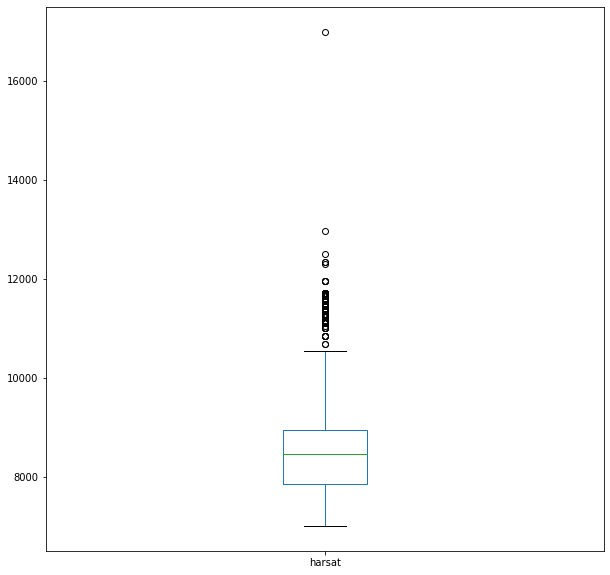

In [32]:
rebar.boxplot(column=['harsat'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=True)

In [33]:
q1 = rebar['harsat'].quantile(0.25)
q2 = rebar['harsat'].quantile(0.5)
q3 = rebar['harsat'].quantile(0.75)
IQR = q3-q1
max_w = q3+1.5*IQR
min_w = q1-1.5*IQR

In [34]:
rebar = rebar[rebar['harsat']<max_w]

In [35]:
rebar = rebar[rebar['harsat']<12000]

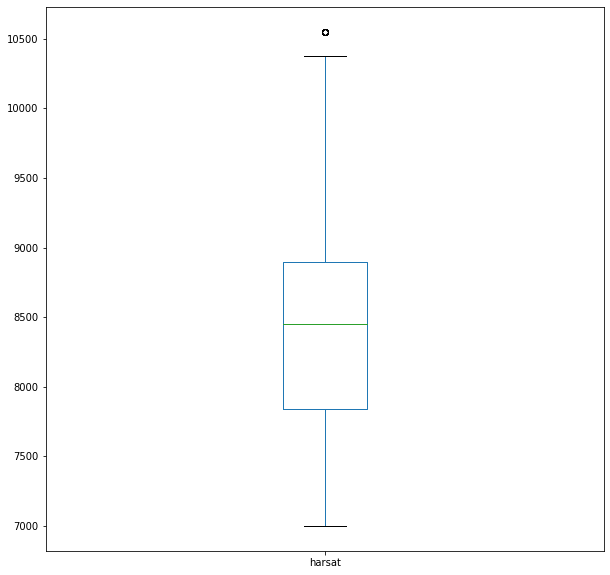

In [36]:
rebar.boxplot(column=['harsat'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=True)

In [37]:
ihsg['Date'] = pd.to_datetime(ihsg['Date'],format='%Y-%m-%d')

In [38]:
ihsg = ihsg[['Date','Close']]

In [39]:
usd['Date'] = pd.to_datetime(usd['Date'])

In [40]:
ihsg.rename(columns={'Close':'IHSG'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
usd = usd[['Date','Price']].rename(columns={'Price':'idr_usd'})

In [42]:
cny['Date'] = pd.to_datetime(cny['Date'])

In [43]:
cny = cny[['Date','Price']].rename(columns={'Price':'idr_cny'})

In [44]:
df_new = rebar.merge(ihsg,how='left',left_on='tanggal_po',right_on='Date')

In [45]:
df_new = df_new.merge(usd,how='left',left_on='tanggal_po',right_on='Date')

In [46]:
df_new = df_new.merge(cny,how='left',left_on='tanggal_po',right_on='Date')

In [47]:
df_new

,nama_proyek,tanggal_po,harsat,Daerah,Date_x,IHSG,Date_y,idr_usd,Date,idr_cny
0,PEMBANGUNAN STADION PROVINSI BANTEN,2021-03-22,9575.0,JAWA,2021-03-22,6301.130859,2021-03-22,"14,400.0",2021-03-22,"2,212.49"
1,PEMBANGUNAN STADION PROVINSI BANTEN,2021-03-22,9475.0,JAWA,2021-03-22,6301.130859,2021-03-22,"14,400.0",2021-03-22,"2,212.49"
2,REST AREA PEJAGAN MALANG,2019-02-14,8300.0,JAWA,2019-02-14,6420.018066,2019-02-14,"14,090.0",2019-02-14,"2,080.58"
3,UNIVERSITAS SYIAH KUALA BANDA ACEH,2018-09-25,9050.0,SUMATERA,2018-09-25,5874.298828,2018-09-25,"14,920.0",2018-09-25,"2,172.87"
4,JALAN TOL BOGOR RING ROAD SEKSI 3A,2020-03-24,7450.0,JAWA,2020-03-24,3937.632080,2020-03-24,"16,500.0",2020-03-24,"2,328.35"
...,...,...,...,...,...,...,...,...,...,...
4917,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,7625.0,JAWA,2020-07-14,5079.122070,2020-07-14,"14,450.0",2020-07-14,"2,050.93"
4918,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,7625.0,JAWA,2020-07-14,5079.122070,2020-07-14,"14,450.0",2020-07-14,"2,050.93"
4919,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,7625.0,JAWA,2020-07-14,5079.122070,2020-07-14,"14,450.0",2020-07-14,"2,050.93"
4920,PEMB JALAN TOL SEMARANG DEMAK,2020-07-14,7625.0,JAWA,2020-07-14,5079.122070,2020-07-14,"14,450.0",2020-07-14,"2,050.93"


In [48]:
df_new.drop(columns=['Date'],inplace=True)

In [49]:
df_new.drop(columns=['Date_x','Date_y'],inplace=True)

In [50]:
df_new = df_new.drop_duplicates()

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 4913
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nama_proyek  1244 non-null   object        
 1   tanggal_po   1244 non-null   datetime64[ns]
 2   harsat       1244 non-null   float64       
 3   Daerah       1242 non-null   object        
 4   IHSG         1197 non-null   float64       
 5   idr_usd      1200 non-null   object        
 6   idr_cny      1205 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 77.8+ KB


In [52]:
df_new.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 4913
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nama_proyek  1195 non-null   object        
 1   tanggal_po   1195 non-null   datetime64[ns]
 2   harsat       1195 non-null   float64       
 3   Daerah       1195 non-null   object        
 4   IHSG         1195 non-null   float64       
 5   idr_usd      1195 non-null   object        
 6   idr_cny      1195 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 74.7+ KB


In [54]:
df_new['idr_usd'] = df_new['idr_usd'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_new['idr_usd'] = df_new['idr_usd'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df_new['idr_cny'] = df_new['idr_cny'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_new['idr_cny'] = df_new['idr_cny'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 4913
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nama_proyek  1195 non-null   object        
 1   tanggal_po   1195 non-null   datetime64[ns]
 2   harsat       1195 non-null   float64       
 3   Daerah       1195 non-null   object        
 4   IHSG         1195 non-null   float64       
 5   idr_usd      1195 non-null   float64       
 6   idr_cny      1195 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 74.7+ KB


In [59]:
df_new['Daerah'].value_counts()

JAWA             914
SUMATERA         116
NUSA TENGGARA     66
SULAWESI          35
KALIMANTAN        25
PAPUA             25
BALI              14
Name: Daerah, dtype: int64

In [60]:
daerah_dummies = pd.get_dummies(df_new['Daerah'],drop_first=True)

In [61]:
df_ready = df_new.merge(daerah_dummies,how='left',left_index=True,right_index=True)

In [62]:
df_ready = df_ready[['IHSG','idr_usd','idr_cny','JAWA','KALIMANTAN','NUSA TENGGARA','PAPUA','SULAWESI','SUMATERA','harsat']]

In [63]:
df_ready

,IHSG,idr_usd,idr_cny,JAWA,KALIMANTAN,NUSA TENGGARA,PAPUA,SULAWESI,SUMATERA,harsat
0,6301.130859,14400.0,2212.49,1,0,0,0,0,0,9575.0
1,6301.130859,14400.0,2212.49,1,0,0,0,0,0,9475.0
2,6420.018066,14090.0,2080.58,1,0,0,0,0,0,8300.0
3,5874.298828,14920.0,2172.87,0,0,0,0,0,1,9050.0
4,3937.632080,16500.0,2328.35,1,0,0,0,0,0,7450.0
...,...,...,...,...,...,...,...,...,...,...
4898,5886.961914,13665.0,1951.60,1,0,0,0,0,0,7600.0
4901,4904.087891,14220.0,1998.76,1,0,0,0,0,0,7225.0
4905,6296.566895,13668.0,1981.84,1,0,0,0,0,0,7760.0
4909,4880.358887,14125.0,1982.70,1,0,0,0,0,0,7475.0


#**SCALING AND SPLIT**

In [64]:
X = df_ready.drop(columns='harsat',axis=1)
y = df_ready['harsat']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
X_train.shape

(836, 9)

In [70]:
X_test.shape

(359, 9)

#**MODELLING**

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [139]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [140]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=64,epochs=1000)

Epoch 1/1000
14/14 [==============================] - 2s 29ms/step - loss: 69968664.0000 - val_loss: 70075728.0000
Epoch 2/1000
14/14 [==============================] - 0s 10ms/step - loss: 69966792.0000 - val_loss: 70074448.0000
Epoch 3/1000
14/14 [==============================] - 0s 18ms/step - loss: 69965720.0000 - val_loss: 70073544.0000
Epoch 4/1000
14/14 [==============================] - 0s 14ms/step - loss: 69964832.0000 - val_loss: 70072736.0000
Epoch 5/1000
14/14 [==============================] - 0s 9ms/step - loss: 69964048.0000 - val_loss: 70071936.0000
Epoch 6/1000
14/14 [==============================] - 0s 23ms/step - loss: 69963200.0000 - val_loss: 70071064.0000
Epoch 7/1000
14/14 [==============================] - 0s 17ms/step - loss: 69962272.0000 - val_loss: 70070056.0000
Epoch 8/1000
14/14 [==============================] - 0s 18ms/step - loss: 69961200.0000 - val_loss: 70068888.0000
Epoch 9/1000
14/14 [==============================] - 0s 12ms/step - loss: 699599

In [141]:
losses = pd.DataFrame(model.history.history)

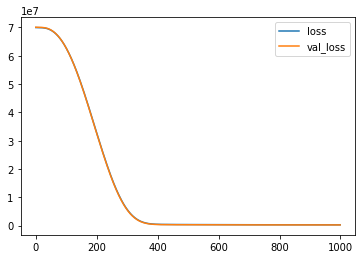

In [142]:
losses.plot()

In [143]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [144]:
X_test

array([[0.63447957, 0.50098889, 0.61754542, ..., 0.        , 0.        ,
        0.        ],
       [0.69036958, 0.57781835, 0.63100162, ..., 0.        , 0.        ,
        0.        ],
       [0.78917447, 0.22714134, 0.55921776, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.87279477, 0.29849384, 0.29975391, ..., 0.        , 0.        ,
        0.        ],
       [0.88067001, 0.14300928, 0.63893398, ..., 0.        , 0.        ,
        1.        ],
       [0.82224689, 0.13738019, 0.62720561, ..., 0.        , 0.        ,
        1.        ]])

In [145]:
predictions = model.predict(X_test)

In [146]:
mean_absolute_error(y_test,predictions)

365.5440908447946

In [147]:
error = mean_absolute_error(y_test,predictions)

In [148]:
np.sqrt(mean_squared_error(y_test,predictions))

488.016525385383

In [149]:
explained_variance_score(y_test,predictions)

0.41846099365627243

In [150]:
df_ready['harsat'].mean()

8341.393305439331

In [151]:
df_ready['harsat'].median()

8395.0

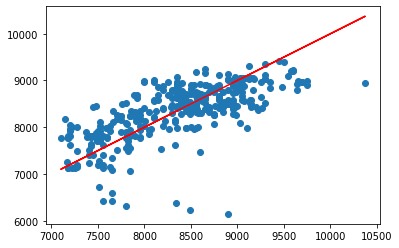

In [152]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [153]:
errors = y_test.values.reshape(359, 1) - predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


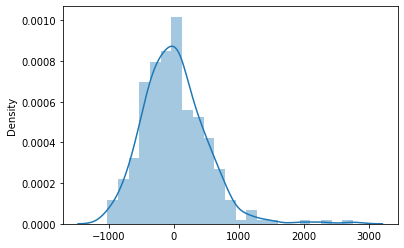

In [154]:
sns.distplot(errors)

In [155]:
testing = df_ready.drop('harsat',axis=1).iloc[0]

In [156]:
testing = scaler.transform(testing.values.reshape(-1, 9))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [157]:
testing

array([[0.85893717, 0.33820173, 0.68555945, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [158]:
model.predict(testing)

array([[9193.707]], dtype=float32)

In [159]:
df_ready.iloc[0]

IHSG              6301.130859
idr_usd          14400.000000
idr_cny           2212.490000
JAWA                 1.000000
KALIMANTAN           0.000000
NUSA TENGGARA        0.000000
PAPUA                0.000000
SULAWESI             0.000000
SUMATERA             0.000000
harsat            9575.000000
Name: 0, dtype: float64

In [93]:
df_ready.columns

Index(['IHSG', 'idr_usd', 'idr_cny', 'JAWA', 'KALIMANTAN', 'NUSA TENGGARA',
       'PAPUA', 'SULAWESI', 'SUMATERA', 'harsat'],
      dtype='object')

#**INPUT PARAMETER**

In [196]:
input_ = pd.DataFrame(columns=['tanggal','IHSG', 'idr_usd', 'idr_cny', 'JAWA', 'KALIMANTAN', 'NUSA TENGGARA',
       'PAPUA', 'SULAWESI', 'SUMATERA'])
tanggal = input('tanggal (YYYY-MM-DD) = ')
IHSG = np.float64(input("IHSG = "))
idr_usd = np.float64(input("idr_usd = "))
idr_cny = np.float64(input("idr_cny = "))
JAWA = np.float64(input("JAWA = "))
KALIMANTAN = np.float64(input("KALIMANTAN = "))
NUSA = np.float64(input("NUSA TENGGARA = "))
PAPUA = np.float64(input("PAPUA = "))
SULAWESI = np.float64(input("SULAWESI = "))
SUMATERA = np.float64(input("SUMATERA = "))
input_1 = pd.DataFrame(data=[[tanggal,IHSG,idr_usd,idr_cny,JAWA,KALIMANTAN,NUSA,PAPUA,SULAWESI,SUMATERA]],columns=['tanggal','IHSG', 'idr_usd', 'idr_cny', 'JAWA', 'KALIMANTAN', 'NUSA TENGGARA',
       'PAPUA', 'SULAWESI', 'SUMATERA'])
input_ = pd.concat([input_,input_1], axis=0)
input_['tanggal'] = pd.to_datetime(input_['tanggal'],format='%Y-%m-%d')
input_.index = range(len(input_.index))

tanggal (YYYY-MM-DD) = 2022-04-27
IHSG = 7196.76
idr_usd = 14439.40
idr_cny = 2204.62
JAWA = 1
KALIMANTAN = 0
NUSA TENGGARA = 0
PAPUA = 0
SULAWESI = 0
SUMATERA = 0


#**OUTPUT PROCESSING**

In [197]:
input_

,tanggal,IHSG,idr_usd,idr_cny,JAWA,KALIMANTAN,NUSA TENGGARA,PAPUA,SULAWESI,SUMATERA
0,2022-04-27,7196.76,14439.4,2204.62,1.0,0.0,0.0,0.0,0.0,0.0


In [198]:
prediksi = input_.drop(columns='tanggal',axis=1)

In [199]:
input_trans = scaler.transform(prediksi.values.reshape(-1, 9))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [200]:
harsat_prediksi = model.predict(input_trans)[0,0]

In [201]:
top_harsat = round(harsat_prediksi + error,2)
bot_harsat = round(harsat_prediksi - error,2)

#**RESULT**

In [202]:
print('harsat prediksi = ',harsat_prediksi,'\n',
      'top harsat = ',top_harsat,'\n',
      'bot harsat = ',bot_harsat)

harsat prediksi =  10094.427 
 top harsat =  10459.97 
 bot harsat =  9728.88


#**EXPORT**

In [167]:
input_pred = input_.copy()

In [168]:
def daerah(row):
  if row['JAWA'] == 1:
    val = 'JAWA'
  elif row['KALIMANTAN'] == 1:
    val = 'KALIMANTAN'
  elif row['NUSA TENGGARA'] == 1:
    val = 'NUSA TENGGARA'
  elif row['PAPUA'] == 1:
    val = 'PAPUA'
  elif row['SULAWESI'] == 1:
    val = 'SULAWESI'
  elif row['SUMATERA'] == 1:
    val = 'SUMATERA'
  else :
    val = 'BALI'
  return val

In [169]:
input_pred['Daerah'] = input_pred.apply(daerah,axis=1)

In [170]:
input_pred['harsat'] = round(harsat_prediksi,2)

In [171]:
input_pred

,tanggal,IHSG,idr_usd,idr_cny,JAWA,KALIMANTAN,NUSA TENGGARA,PAPUA,SULAWESI,SUMATERA,Daerah,harsat
0,2022-04-27,7196.76,14439.4,2204.62,1.0,0.0,0.0,0.0,0.0,0.0,JAWA,10094.429688


In [172]:
input_pred = input_pred[['tanggal','harsat','Daerah','IHSG','idr_usd','idr_cny']]

In [173]:
input_pred

,tanggal,harsat,Daerah,IHSG,idr_usd,idr_cny
0,2022-04-27,10094.429688,JAWA,7196.76,14439.4,2204.62


In [174]:
from google.colab import drive
drive.mount('/content/gdrive')
df_join = pd.read_csv('/content/gdrive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/df_final.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [175]:
df_join

,Unnamed: 0,tanggal,harsat,Daerah,IHSG,idr_usd,idr_cny
0,0,2021-03-22,9575.000000,JAWA,6301.130859,14400.00,2212.49
1,1,2021-03-22,9475.000000,JAWA,6301.130859,14400.00,2212.49
2,2,2019-02-14,8300.000000,JAWA,6420.018066,14090.00,2080.58
3,3,2018-09-25,9050.000000,SUMATERA,5874.298828,14920.00,2172.87
4,4,2020-03-24,7450.000000,JAWA,3937.632080,16500.00,2328.35
...,...,...,...,...,...,...,...
1191,1191,2020-06-26,7225.000000,JAWA,4904.087891,14220.00,1998.76
1192,1192,2020-01-13,7760.000000,JAWA,6296.566895,13668.00,1981.84
1193,1193,2020-06-12,7475.000000,JAWA,4880.358887,14125.00,1982.70
1194,1194,2020-02-26,7425.000000,JAWA,5688.920898,13932.50,1982.57


In [176]:
df_join.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [177]:
df_to_show = [df_join,input_pred]

In [178]:
df_final = pd.concat(df_to_show)

In [179]:
df_final.reset_index(inplace=True)
df_final.drop(columns='index',axis=1,inplace=True)

In [180]:
df_final['tanggal'] = pd.to_datetime(df_final['tanggal'],format='%Y-%m-%d')

In [181]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  1197 non-null   datetime64[ns]
 1   harsat   1197 non-null   float64       
 2   Daerah   1197 non-null   object        
 3   IHSG     1197 non-null   float64       
 4   idr_usd  1197 non-null   float64       
 5   idr_cny  1197 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 56.2+ KB


In [182]:
df_final

,tanggal,harsat,Daerah,IHSG,idr_usd,idr_cny
0,2021-03-22,9575.000000,JAWA,6301.130859,14400.00,2212.49
1,2021-03-22,9475.000000,JAWA,6301.130859,14400.00,2212.49
2,2019-02-14,8300.000000,JAWA,6420.018066,14090.00,2080.58
3,2018-09-25,9050.000000,SUMATERA,5874.298828,14920.00,2172.87
4,2020-03-24,7450.000000,JAWA,3937.632080,16500.00,2328.35
...,...,...,...,...,...,...
1192,2020-01-13,7760.000000,JAWA,6296.566895,13668.00,1981.84
1193,2020-06-12,7475.000000,JAWA,4880.358887,14125.00,1982.70
1194,2020-02-26,7425.000000,JAWA,5688.920898,13932.50,1982.57
1195,2022-04-26,10093.419922,JAWA,7237.250000,14415.55,2200.95


In [183]:
df_tanggal = df_final.groupby('tanggal')[['harsat','Daerah','IHSG','idr_usd','idr_cny']].mean()

In [184]:
from scipy import stats

In [185]:
df_daerah = df_final.groupby('Daerah')[['harsat']].agg(['mean',stats.mode,'median'])

In [186]:
df_daerah

harsat                          
                      mean              mode  median
Daerah                                              
BALI           8436.428571   ([7850.0], [2])  8445.0
JAWA           8312.788045  ([7850.0], [36])  8375.0
KALIMANTAN     7897.600000   ([7475.0], [5])  7800.0
NUSA TENGGARA  8484.984848   ([8325.0], [6])  8475.0
PAPUA          8248.000000   ([7400.0], [2])  8495.0
SULAWESI       8420.142857   ([8500.0], [4])  8450.0
SUMATERA       8596.336207  ([8350.0], [10])  8500.0

In [203]:
df_final.sort_values(by='tanggal',ascending=True)

,tanggal,harsat,Daerah,IHSG,idr_usd,idr_cny
422,2018-01-04,8620.000000,JAWA,6292.320801,13423.50,2067.27
277,2018-01-05,8200.000000,JAWA,6353.737793,13415.50,2067.51
282,2018-01-05,8200.000000,JAWA,6353.737793,13415.50,2067.51
628,2018-01-08,8500.000000,JAWA,6385.403809,13426.50,2065.70
888,2018-01-08,8572.000000,JAWA,6385.403809,13426.50,2065.70
...,...,...,...,...,...,...
740,2021-05-24,10080.000000,JAWA,5763.631836,14350.00,2234.89
847,2021-05-24,9950.000000,JAWA,5763.631836,14350.00,2234.89
978,2021-05-28,9700.000000,JAWA,5848.616211,14280.00,2241.97
1195,2022-04-26,10093.419922,JAWA,7237.250000,14415.55,2200.95


In [188]:
#drive.mount('/drive')
#path = '/drive/MyDrive/[PTPP]/Project/01. Predicting Reinforcement Bar Price/Datasets/df_final.csv'
#df_final.to_csv(path)